# Performance Metrics Evaluation

This notebook will be to assess our trading strategy's effectiveness. We will look at:



In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

os.chdir("C:/users/andre/projects/stock-price-sentiment-prediction/data/")
df = pd.read_csv("AAPL_stock_prices_cleaned.csv")  # Load without parse_dates
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Convert manually
df.set_index("Date", inplace=True)  # Set index after conversion

In [10]:
#Cumulative Return
initial_value = df["Portfolio_Value"].iloc[0]
final_value = df["Portfolio_Value"].iloc[-1]

cumulative_return = (final_value - initial_value) / initial_value
print(f"Cumulative Return: {cumulative_return:.2%}")

Cumulative Return: 15.85%


In [11]:
#Daily Returns and Volatility
df["Daily_Return"] = df["Portfolio_Value"].pct_change()

volatility = df["Daily_Return"].std() * np.sqrt(252)
print(f"Annualized Volatility: {volatility:.2%}")

Annualized Volatility: 11.74%


In [12]:
#Sharpe Ratio
risk_free_rate = 0.02
sharpe_ratio = ((df["Daily_Return"].mean() - risk_free_rate / 252) /
                df["Daily_Return"].std()) * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

Sharpe Ratio: 1.25


In [14]:
#Max Drawdown
rolling_max = df["Portfolio_Value"].cummax()
drawdown = df["Portfolio_Value"] / rolling_max - 1
max_drawdown = drawdown.min()
print(f"Maximum Drawdown: {max_drawdown:.2%}")

Maximum Drawdown: -4.95%


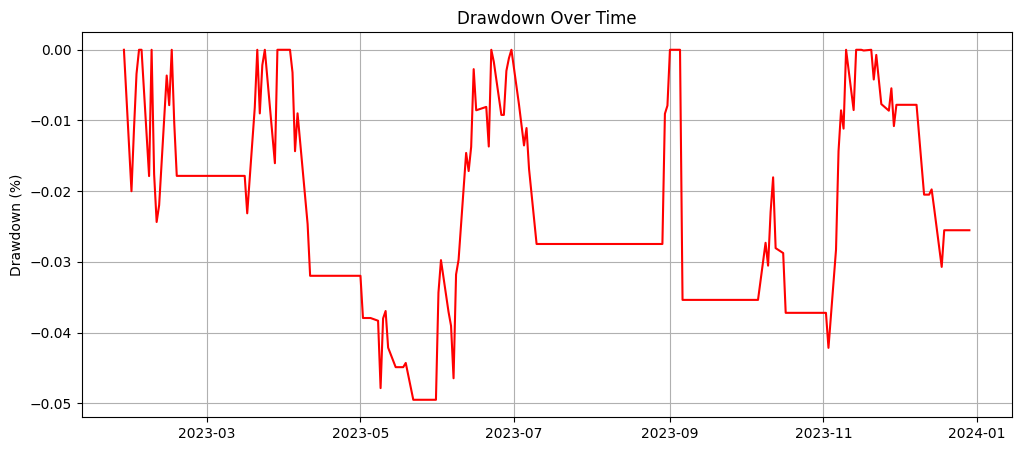

In [15]:
plt.figure(figsize=(12,5))
plt.plot(drawdown, color='red')
plt.title("Drawdown Over Time")
plt.ylabel("Drawdown (%)")
plt.grid(True)
plt.show()

In [16]:
#Buy and Hold Benchmark
buy_hold_return = (df["Close"].iloc[-1] - df["Close"].iloc[0]) / df["Close"].iloc[0]
print(f"Buy-and-Hold Return: {buy_hold_return:.2%}")

Buy-and-Hold Return: 32.67%


In [19]:
#Win rate
buy_prices = df.loc[df["Signal"] == 1, "Close"]
sell_prices = df.loc[df["Signal"] == -1, "Close"]

#Match Sells to prior buys
num_trades = min(len(buy_prices), len(sell_prices))
profits = sell_prices.iloc[:num_trades].values - buy_prices.iloc[:num_trades].values
win_rate = np.sum(profits > 0) / len(profits)

print(f"Win Rate: {win_rate:.2%}")


Win Rate: 41.75%


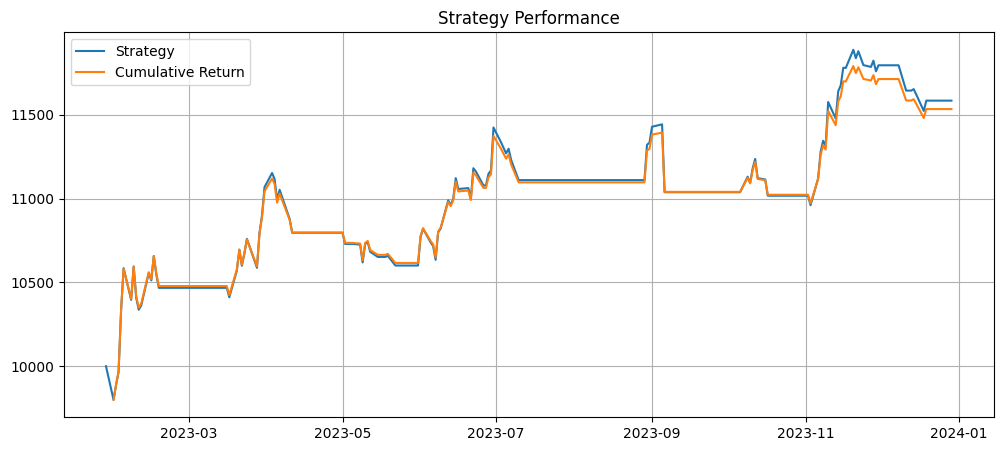

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df["Portfolio_Value"], label="Strategy")
plt.plot(initial_value * (1 + df["Daily_Return"].cumsum()), label="Cumulative Return")
plt.title("Strategy Performance")
plt.legend()
plt.grid(True)
plt.show()
